# **Aprendizaje Supervisado**
**Josefina Valenzuela L.**

*Diplomado Data Engineer*
*USACH*
*(Módulo Machine Learning)*



## Regresión Lineal

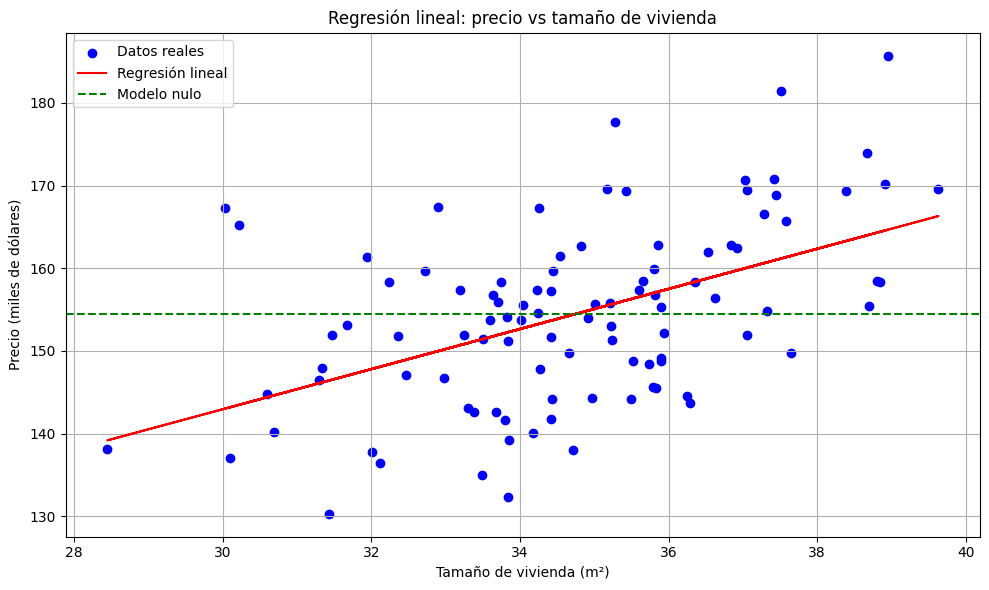

MSE del modelo de regresión: 88.36
R² del modelo de regresión: 0.25


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generar datos sintéticos: tamaño de vivienda (m²) y precio (miles de dólares)
np.random.seed(42)
X = 2.5 * np.random.randn(100, 1) + 35  # tamaño en m²
noise = np.random.randn(100, 1) * 10
y = 3 * X + 50 + noise  # precio en miles de dólares

# Ajustar modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Calcular métricas
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Visualización
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, y_pred, color='red', label='Regresión lineal')
plt.axhline(y.mean(), color='green', linestyle='--', label='Modelo nulo')
plt.xlabel('Tamaño de vivienda (m²)')
plt.ylabel('Precio (miles de dólares)')
plt.title('Regresión lineal: precio vs tamaño de vivienda')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Resultados
print(f"MSE del modelo de regresión: {mse:.2f}")
print(f"R² del modelo de regresión: {r2:.2f}")


El modelo explica el 25% de la variabilidad en los precios de viviendas.
* Esto no es un valor alto, pero sí indica que hay cierta relación entre el tamaño de la vivienda y el precio.
El 75% restante de la variabilidad no está explicada por el modelo, lo que sugiere que:
* Hay otras variables importantes que no se están considerando (ubicación, antigüedad, número de habitaciones, etc.).
* Puede haber ruido en los datos o relaciones no lineales.

El MSE representa el error promedio al cuadrado entre los precios reales y los predichos.
* En este caso, como los precios están en miles de dólares, un MSE de 88.36 implica que el error cuadrático promedio es de aproximadamente $9,400 (porque (88.36)^(1/2)  ≈ 9.4).

 El modelo comete errores moderados en sus predicciones. Si el rango de precios es amplio (por ejemplo, entre 100k y 300k), este error puede ser aceptable. Si los precios son más homogéneos, puede ser preocupante.

## Regresión Logística

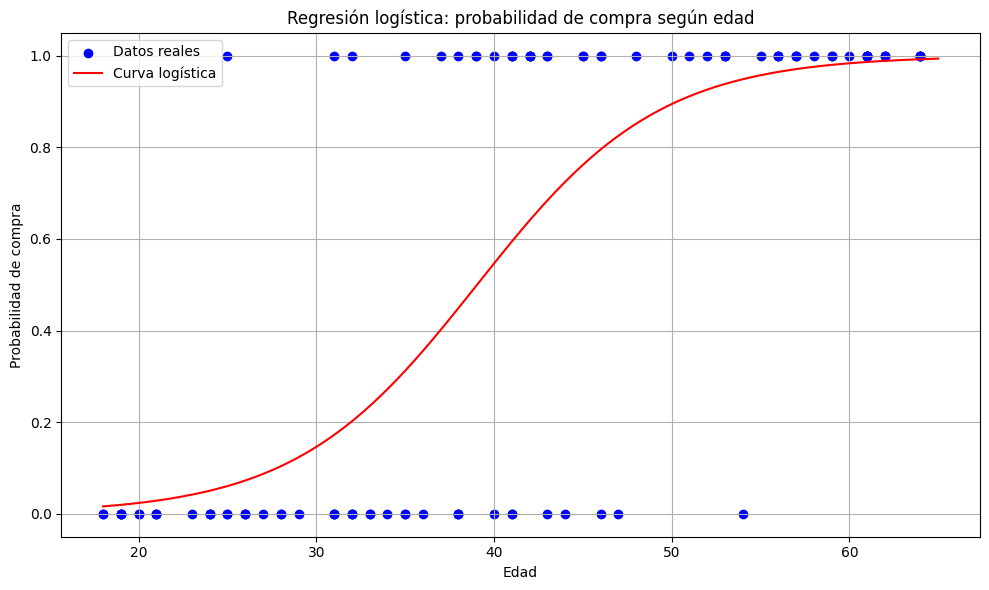

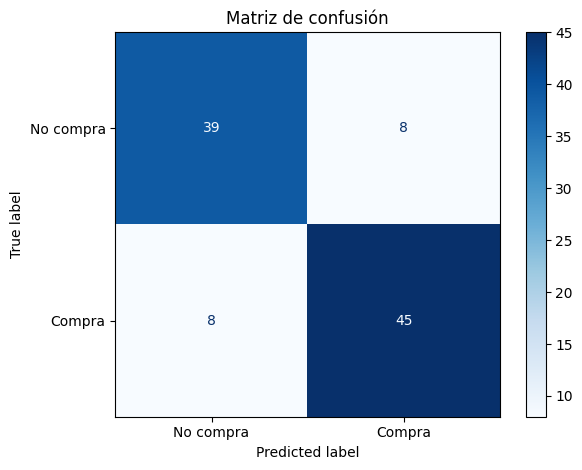

Accuracy del modelo: 0.84


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Generar datos sintéticos: edad y compra de seguro (0 = no, 1 = sí)
np.random.seed(42)
edad = np.random.randint(18, 65, size=100).reshape(-1, 1)
probabilidad = 1 / (1 + np.exp(-(0.2 * edad - 8)))  # función logística
compra = (np.random.rand(100, 1) < probabilidad).astype(int).ravel()

# Ajustar modelo de regresión logística
modelo = LogisticRegression()
modelo.fit(edad, compra)
compra_pred = modelo.predict(edad)

# Evaluación del modelo
accuracy = accuracy_score(compra, compra_pred)
matriz = confusion_matrix(compra, compra_pred)

# Visualización de la curva logística
edad_range = np.linspace(18, 65, 200).reshape(-1, 1)
prob_pred = modelo.predict_proba(edad_range)[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(edad, compra, color='blue', label='Datos reales')
plt.plot(edad_range, prob_pred, color='red', label='Curva logística')
plt.xlabel('Edad')
plt.ylabel('Probabilidad de compra')
plt.title('Regresión logística: probabilidad de compra según edad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualización de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=["No compra", "Compra"])
disp.plot(cmap='Blues')
plt.title("Matriz de confusión")
plt.tight_layout()
plt.show()

# Resultados
print(f"Accuracy del modelo: {accuracy:.2f}")


**Accuracy 0.84**
* El modelo clasificó correctamente el 84% de los casos.
* Indica qué tan bien el modelo predice si un cliente comprará o no un seguro.
* Pero no basta por sí sola: puede ser engañosa si las clases están desbalanceadas (por ejemplo, si casi todos los clientes compran).

**Interpretación Matriz de Confusión**
* **True Positives (TP):** 45 → clientes que compraron y fueron clasificados correctamente.
* **True Negatives (TN):** 39 → clientes que no compraron y fueron clasificados correctamente.
* **False Positives (FP):** 8 → el modelo predijo compra, pero no compraron.
* **False Negatives (FN):** 8 → el modelo predijo no compra, pero sí compraron.




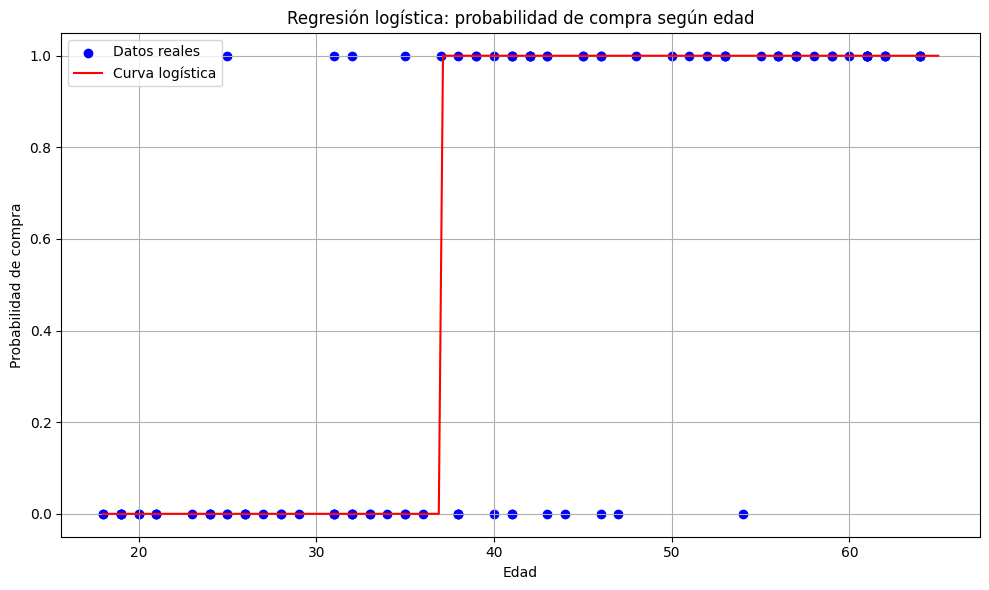

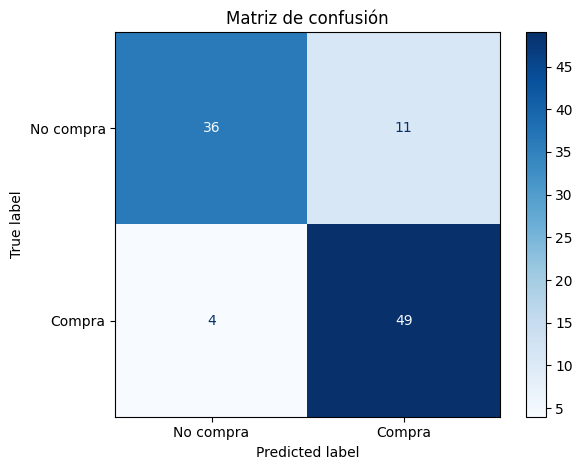

Accuracy del modelo: 0.85


In [ ]:

# Obtener probabilidades
probabilidades = modelo.predict_proba(edad)[:, 1]

# Ajustar el umbral (por ejemplo, 0.4)
umbral = 0.4
predicciones = (probabilidades >= umbral).astype(int)

# Evaluación del modelo
accuracy = accuracy_score(compra, predicciones)
matriz = confusion_matrix(compra, predicciones)

# Visualización de la curva logística
edad_range = np.linspace(18, 65, 200).reshape(-1, 1)
prob_pred = modelo.predict_proba(edad_range)[:, 1]

predicciones_v2 = (prob_pred >= umbral).astype(int)

plt.figure(figsize=(10, 6))
plt.scatter(edad, compra, color='blue', label='Datos reales')
plt.plot(edad_range, predicciones_v2, color='red', label='Curva logística')
plt.xlabel('Edad')
plt.ylabel('Probabilidad de compra')
plt.title('Regresión logística: probabilidad de compra según edad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualización de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=["No compra", "Compra"])
disp.plot(cmap='Blues')
plt.title("Matriz de confusión")
plt.tight_layout()
plt.show()

# Resultados
print(f"Accuracy del modelo: {accuracy:.2f}")

Dejamos el umbral más bajo, en 0.4, para fomentar la Clase Positiva/Compra.
* Aumentan en 4 casos los verdaderos positivos.
* Bajan en 3 casos los verdaderos negativos.
* Bajan en 4 casos los falsos negativos.
* Suben 3 casos los falsos positivos.

Accuracy sube de 0.84 a 0.85.
Por lo tanto, la mejora es poco significativa. Solo se mejora un 1% la clasificación correcta de los casos.

## Árbol de decisión


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Datos simulados del dataset Adult Income
data = {
    'age': [25, 38, 28, 44, 18, 34, 29, 63, 24, 55],
    'education': ['Bachelors', 'HS-grad', 'HS-grad', 'Some-college', 'HS-grad',
                  'Bachelors', 'Assoc-acdm', 'HS-grad', 'Some-college', 'Bachelors'],
    'hours_per_week': [40, 50, 40, 40, 30, 60, 40, 40, 20, 45],
    'marital_status': ['Never-married', 'Married-civ-spouse', 'Never-married',
                       'Married-civ-spouse', 'Never-married', 'Married-civ-spouse',
                       'Never-married', 'Widowed', 'Never-married', 'Married-civ-spouse'],
    'income': ['<=50K', '>50K', '<=50K', '>50K', '<=50K',
               '>50K', '<=50K', '>50K', '<=50K', '>50K']
}

# Crear DataFrame
adult_df = pd.DataFrame(data)
adult_df

,age,education,hours_per_week,marital_status,income
0,25,Bachelors,40,Never-married,<=50K
1,38,HS-grad,50,Married-civ-spouse,>50K
2,28,HS-grad,40,Never-married,<=50K
3,44,Some-college,40,Married-civ-spouse,>50K
4,18,HS-grad,30,Never-married,<=50K
5,34,Bachelors,60,Married-civ-spouse,>50K
6,29,Assoc-acdm,40,Never-married,<=50K
7,63,HS-grad,40,Widowed,>50K
8,24,Some-college,20,Never-married,<=50K
9,55,Bachelors,45,Married-civ-spouse,>50K


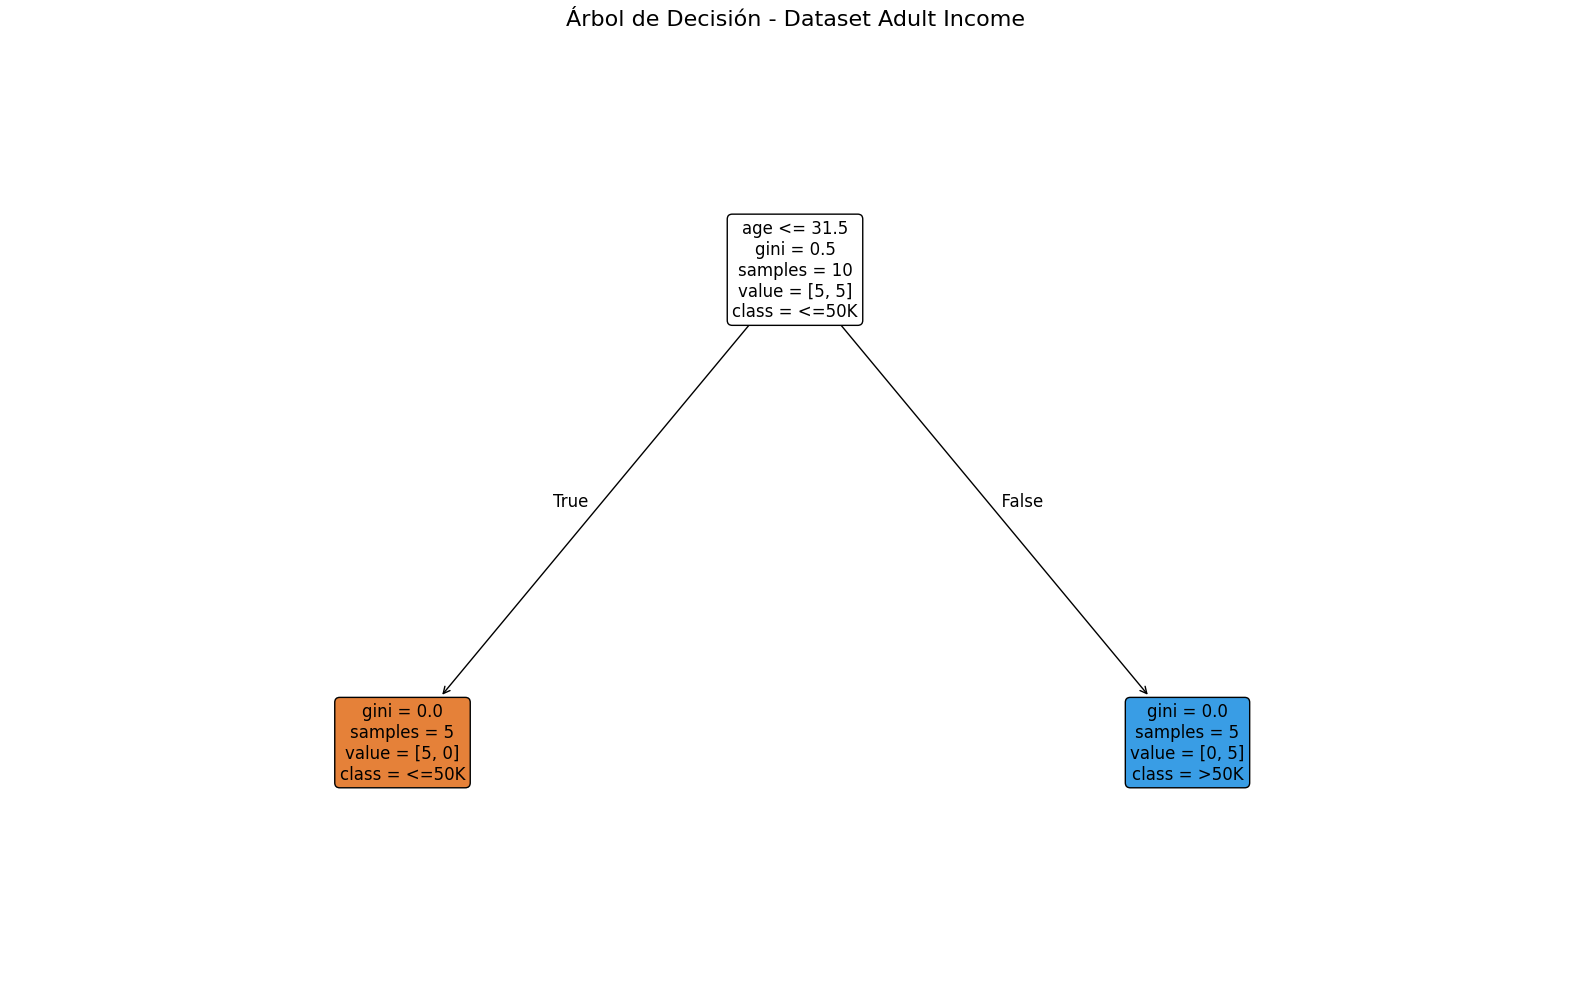

In [ ]:


# Codificar variables categóricas
le = LabelEncoder()
adult_df['education'] = le.fit_transform(adult_df['education'])
adult_df['marital_status'] = le.fit_transform(adult_df['marital_status'])
adult_df['income'] = (adult_df['income'] == '>50K').astype(int)

# Separar variables predictoras y objetivo
X = adult_df[['age', 'education', 'hours_per_week', 'marital_status']]
y = adult_df['income']

# Entrenar el árbol de decisión
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X, y)

# Mejorar visualización del árbol
plt.figure(figsize=(16, 10))
plot_tree(
    clf,
    filled=True,
    feature_names=X.columns,
    class_names=['<=50K', '>50K'],
    rounded=True,
    fontsize=12
)
plt.title("Árbol de Decisión - Dataset Adult Income", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
adult_df = pd.DataFrame(data)
adult_df.sort_values(by='age')

,age,education,hours_per_week,marital_status,income
4,18,HS-grad,30,Never-married,<=50K
8,24,Some-college,20,Never-married,<=50K
0,25,Bachelors,40,Never-married,<=50K
2,28,HS-grad,40,Never-married,<=50K
6,29,Assoc-acdm,40,Never-married,<=50K
5,34,Bachelors,60,Married-civ-spouse,>50K
1,38,HS-grad,50,Married-civ-spouse,>50K
3,44,Some-college,40,Married-civ-spouse,>50K
9,55,Bachelors,45,Married-civ-spouse,>50K
7,63,HS-grad,40,Widowed,>50K


Se observa que las personas entre 18 y 29 años tienen un ingreso <= 50K y aquellos entre 34 y 63 > a 50k.
* Va acorde con el corte del nodo inicial (edad <=31.5).

## Random Forest

Precisión del modelo: 1.00
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Importancia de las variables:
sepal length (cm)    0.104105
sepal width (cm)     0.044605
petal length (cm)    0.417308
petal width (cm)     0.433982
dtype: float64


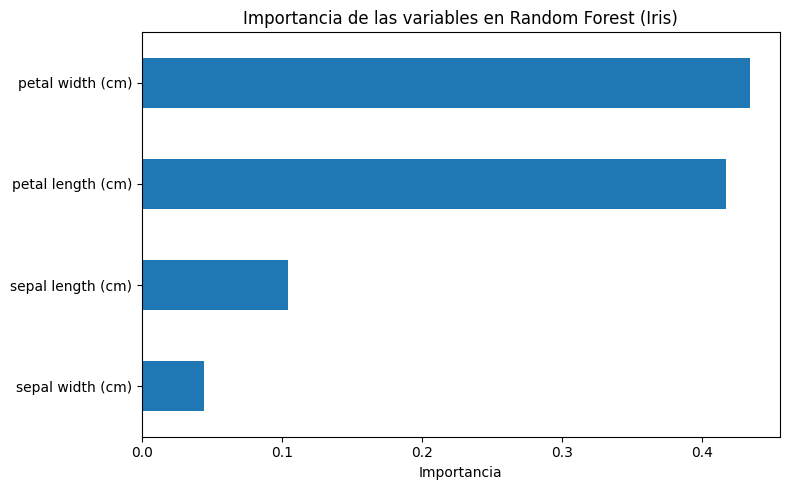

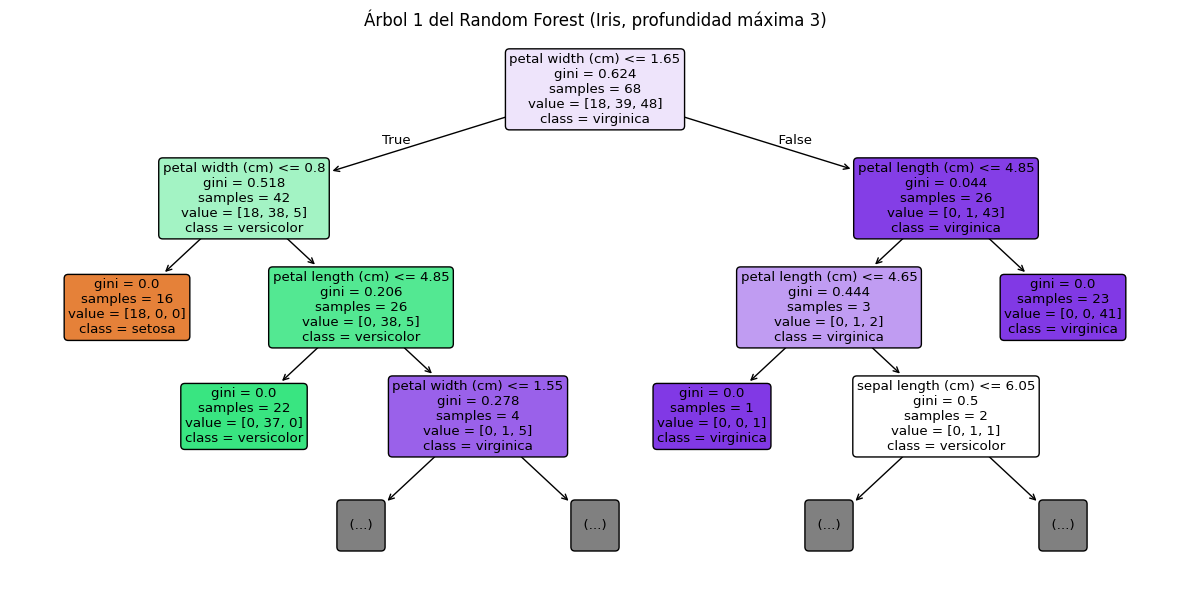

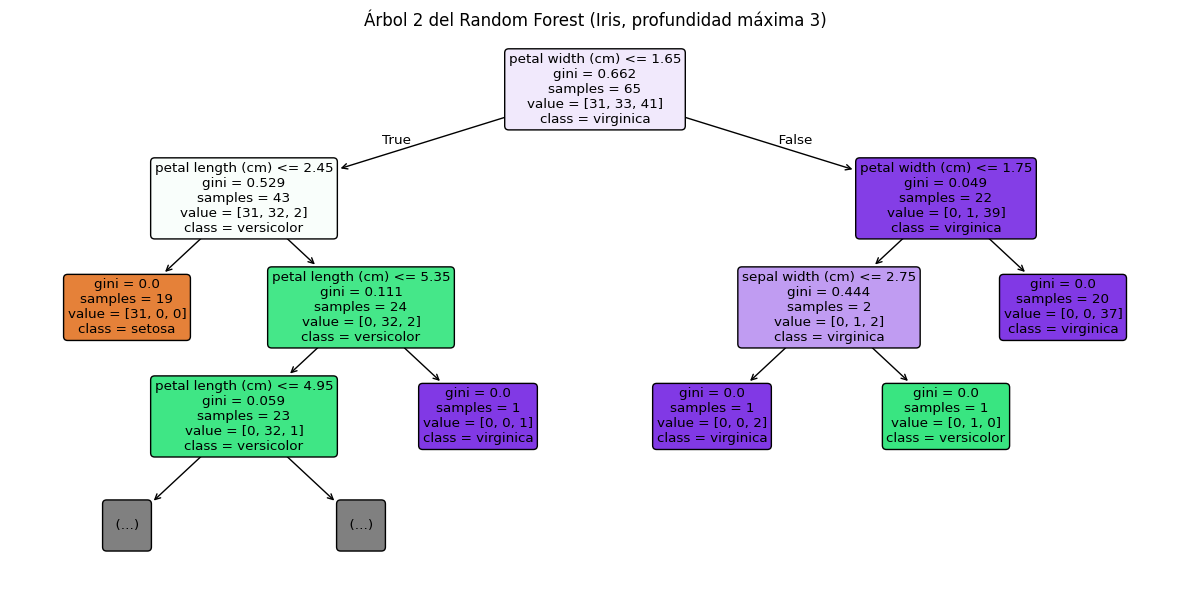

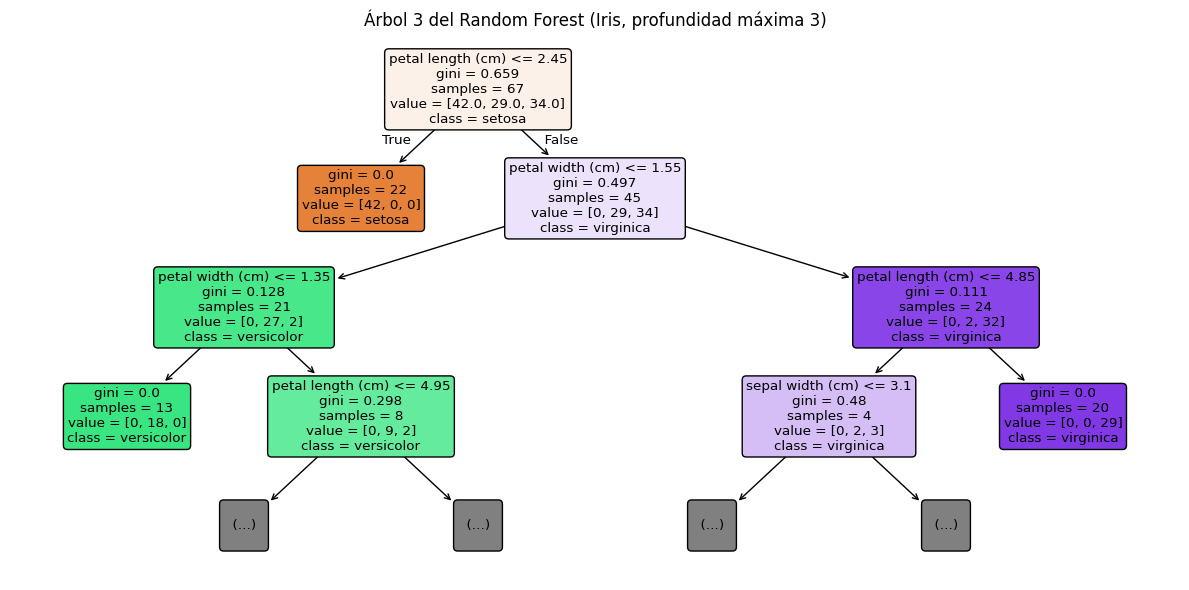

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import pandas as pd
import matplotlib.pyplot as plt

# 1. Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# 2. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Entrenar modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4. Evaluar el modelo
y_pred = model.predict(X_test)
print(f"Precisión del modelo: {accuracy_score(y_test, y_pred):.2f}")
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# 5. Importancia de las variables
importancia = pd.Series(model.feature_importances_, index=feature_names)
print("Importancia de las variables:")
print(importancia)

# 6. Visualización de importancia
importancia.sort_values().plot(kind='barh', figsize=(8, 5), title='Importancia de las variables en Random Forest (Iris)')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

# 7. Visualizar los primeros 3 árboles del bosque
for i in range(3):
    plt.figure(figsize=(12, 6))
    plot_tree(
        model.estimators_[i],
        feature_names=feature_names,
        class_names=iris.target_names,
        filled=True,
        rounded=True,
        max_depth=3
    )
    plt.title(f"Árbol {i+1} del Random Forest (Iris, profundidad máxima 3)")
    plt.tight_layout()
    plt.show()


## Gradient Boosting

Precisión: 1.00
Importancia de las variables:
sepal length (cm)    0.003420
sepal width (cm)     0.017775
petal length (cm)    0.595202
petal width (cm)     0.383604
dtype: float64


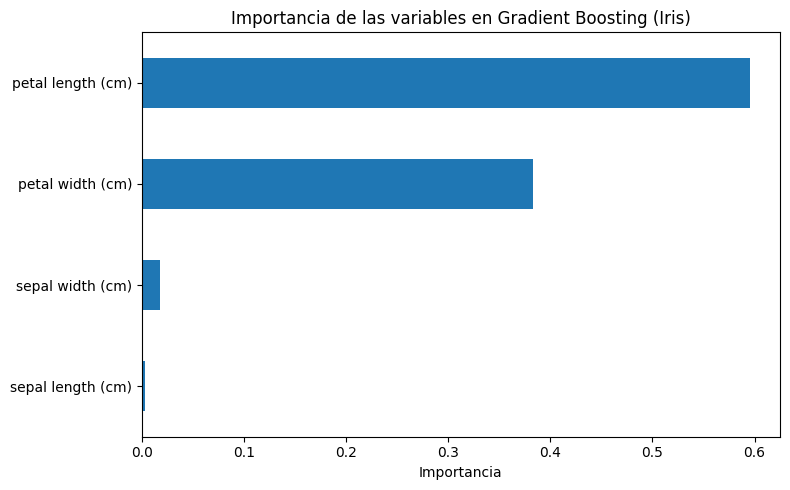

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cargar datos
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

# Entrenar modelo
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Evaluar
y_pred = gb_model.predict(X_test)
print(f"Precisión: {accuracy_score(y_test, y_pred):.2f}")

# Importancia de las variables
importancia_gb = pd.Series(gb_model.feature_importances_, index=feature_names)
print("Importancia de las variables:")
print(importancia_gb)

# Visualización de importancia
importancia_gb.sort_values().plot(kind='barh', figsize=(8, 5), title='Importancia de las variables en Gradient Boosting (Iris)')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()


* Ambos modelos clasificaron perfectamente el conjunto de prueba en este caso.


* Ambos modelos identifican petal length y petal width como las variables más relevantes.
* Gradient Boosting tiende a enfocarse más en las variables más predictivas, mientras que Random Forest distribuye más la importancia.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# 1. Cargar datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# 2. Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Definir grids de hiperparámetros
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, None],
    'min_samples_split': [2, 4]
}

gb_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

# 4. GridSearchCV para Random Forest
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5)
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_
rf_acc = accuracy_score(y_test, rf_best.predict(X_test))

# 5. GridSearchCV para Gradient Boosting
gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_param_grid, cv=5)
gb_grid.fit(X_train, y_train)
gb_best = gb_grid.best_estimator_
gb_acc = accuracy_score(y_test, gb_best.predict(X_test))

# 6. Mostrar resultados
print("Mejores parámetros Random Forest:")
print(rf_grid.best_params_)
print(f"Precisión: {rf_acc:.2f}\n")

print("Mejores parámetros Gradient Boosting:")
print(gb_grid.best_params_)
print(f"Precisión: {gb_acc:.2f}")


Mejores parámetros Random Forest:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Precisión: 1.00

Mejores parámetros Gradient Boosting:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Precisión: 1.00


 **¿Cómo funciona GridSearchCV?**

Define un espacio de búsqueda (param_grid) con combinaciones de hiperparámetros.

Para cada combinación:
* Entrena el modelo usando validación cruzada (cv=5).
* Evalúa el rendimiento promedio.
* Selecciona la mejor combinación según la métrica (por defecto, precisión).
* Devuelve el mejor modelo (best_estimator_) que puedes usar para predecir.

**Ventajas**
* Automatiza la búsqueda de hiperparámetros.
* Usa validación cruzada para evitar sobreajuste.
* Compatible con cualquier modelo de scikit-learn.

## XGBoost


In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Cargar el dataset
url = "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"
df = pd.read_csv(url)
df



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:08:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


ROC-AUC: 0.9706

Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.73      0.83       148

    accuracy                           1.00     85443
   macro avg       0.98      0.86      0.92     85443
weighted avg       1.00      1.00      1.00     85443



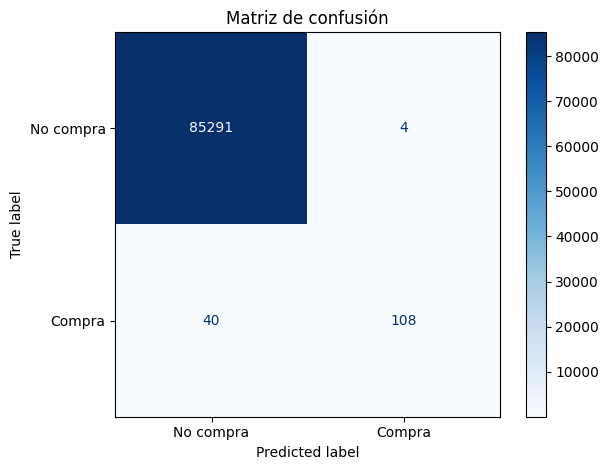

Accuracy del modelo: 1.00

Matriz de confusión:
 [[85291     4]
 [   40   108]]


<Figure size 1000x600 with 0 Axes>

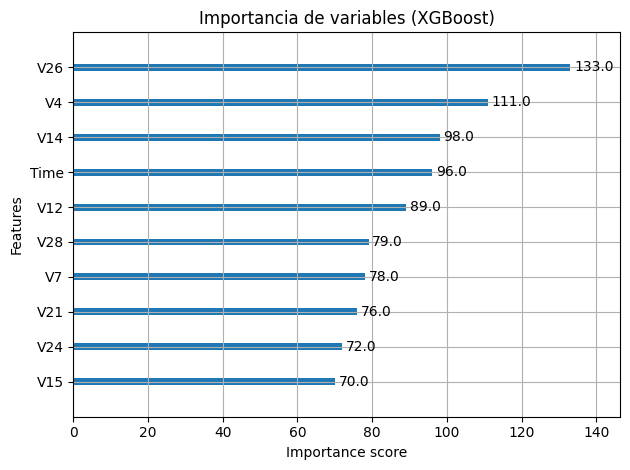

In [ ]:
# Separar características y variable objetivo
X = df.drop("Class", axis=1)
y = df["Class"]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Entrenar el modelo XGBoost
model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    use_label_encoder=False,
    eval_metric='auc'
)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluación
print("ROC-AUC:", round(roc_auc_score(y_test, y_pred_proba), 4))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
matriz = confusion_matrix(y_test, y_pred)

# Visualización de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=["No compra", "Compra"])
disp.plot(cmap='Blues')
plt.title("Matriz de confusión")
plt.tight_layout()
plt.show()

# Resultados
print(f"Accuracy del modelo: {accuracy:.2f}")
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))

# Importancia de variables
plt.figure(figsize=(10, 6))
plot_importance(model, max_num_features=10, importance_type='weight')
plt.title("Importancia de variables (XGBoost)")
plt.tight_layout()
plt.show()

In [ ]:
df.groupby(['Class'])['V1'].count()/df.shape[0]

,V1
Class,
0,0.998273
1,0.001727


## Red neuronal simple

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Datos
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Red neuronal simple
model = MLPClassifier(hidden_layer_sizes=(4,), activation='relu', max_iter=500, random_state=42)
model.fit(X_train, y_train)

# Evaluación
print("Precisión:", model.score(X_test, y_test))


Precisión: 0.3333333333333333


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


**Baja precisión, podría ser por pocas neuronas o capas**

Agreguemos más capaz de entrenamiento.
La red tiene solo una capa oculta con 4 neuronas. Esto puede ser demasiado simple para capturar patrones.

**Solución: Probar con más neuronas o capa**

1 capa oculta 4 neuronas --> 5 capas ocultas 10 neuronas

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Datos
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Red neuronal simple
model = MLPClassifier(hidden_layer_sizes=(10,5), activation='relu', max_iter=500, random_state=42)
model.fit(X_train, y_train)

# Evaluación
print("Precisión:", model.score(X_test, y_test))

Precisión: 0.9777777777777777


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


**Otra causa de la baja precisión podría ser el hecho que los datos no están escalados**

Las redes neuronales son sensibles a la escala de los datos. Si las variables tienen rangos muy distintos, el entrenamiento puede ser ineficiente.

**Solución: Escalar los datos con StandardScaler**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Red neuronal simple
model = MLPClassifier(hidden_layer_sizes=(4,), activation='relu', max_iter=500, random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluación
print("Precisión:", model.score(X_test_scaled, y_test))


Precisión: 0.5111111111111111


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


## GPT


In [ ]:
pip install google-generativeai

In [ ]:
api_key_ = ""

In [ ]:
# Instalar librería si no está instalada
# pip install google-generativeai

import google.generativeai as genai

# Configura tu API Key
genai.configure(api_key= api_key_)

# Inicializa el modelo Gemini
model = genai.GenerativeModel("gemini-2.5-pro")

print("Chatbot iniciado. Escribe 'salir' para terminar.\n")

# Loop del chatbot
while True:
    user_input = input("Tú: ")
    if user_input.lower() == "salir":
        print("Chatbot: ¡Hasta luego!")
        break

    # Generar respuesta con Gemini
    response = model.generate_content(user_input)
    print("Chatbot:", response.text)

Chatbot iniciado. Escribe 'salir' para terminar.

Tú: Hola
Chatbot: ¡Hola! ¿En qué puedo ayudarte hoy?
Tú: Que clima hay en santiago
Chatbot: Claro, aquí tienes el pronóstico del tiempo para **Santiago de Chile**, que es la ciudad más común con ese nombre.

---

### **Clima en Santiago de Chile**

**Ahora mismo:**

*   **Temperatura:** 15°C 🌡️
*   **Condición:** Despejado ☀️
*   **Sensación térmica:** 14°C
*   **Humedad:** 72%
*   **Viento:** 6 km/h (calma)

**Pronóstico para hoy (Martes):**

*   **Máxima:** 18°C
*   **Mínima:** 6°C
*   **Resumen:** Se espera un día mayormente soleado y agradable. La noche será fría y despejada.

**Pronóstico para los próximos días:**

*   **Miércoles:** Máx: 19°C / Mín: 7°C. Parcialmente nublado. 🌥️
*   **Jueves:** Máx: 20°C / Mín: 8°C. Mayormente soleado. ☀️
*   **Viernes:** Máx: 21°C / Mín: 9°C. Soleado con algunas nubes. 🌤️

---

Si te referías a otra ciudad, por favor, dime cuál. Las más comunes son:

*   **Santiago de Compostela, España**
*   **S

KeyboardInterrupt: 

### Clases Desbalanceadas


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import numpy as np

# Cargar dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Simular desbalance: eliminar parte de la clase 1
X_balanced = X[y == 0]
y_balanced = y[y == 0]
X_minority = X[y == 1][:50]
y_minority = y[y == 1][:50]

X_imbalanced = np.vstack((X_balanced, X_minority))
y_imbalanced = np.hstack((y_balanced, y_minority))

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_imbalanced, y_imbalanced, stratify=y_imbalanced, test_size=0.3, random_state=42)

# Modelo con class_weight='balanced'
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Modelo con class_weight='balanced'")
print(classification_report(y_test, y_pred_rf))

# Modelo con SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

model_smote = RandomForestClassifier(random_state=42)
model_smote.fit(X_resampled, y_resampled)
y_pred_smote = model_smote.predict(X_test)

print("Modelo con SMOTE")
print(classification_report(y_test, y_pred_smote))


# XGBoost con scale_pos_weight
n_pos = sum(y_train == 1)
n_neg = sum(y_train == 0)
scale_pos_weight = n_neg / n_pos

model_weighted = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
model_weighted.fit(X_train, y_train)
y_pred_weighted = model_weighted.predict(X_test)

print("XGBoost con scale_pos_weight")
print(classification_report(y_test, y_pred_weighted))


Modelo con class_weight='balanced'
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00        15

    accuracy                           1.00        79
   macro avg       1.00      1.00      1.00        79
weighted avg       1.00      1.00      1.00        79

Modelo con SMOTE
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        64
           1       0.88      1.00      0.94        15

    accuracy                           0.97        79
   macro avg       0.94      0.98      0.96        79
weighted avg       0.98      0.97      0.98        79

XGBoost con scale_pos_weight
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        64
           1       0.88      1.00      0.94        15

    accuracy                           0.97        79
   macro avg       0.94      0.98      0.96    

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [23:45:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


**Interpretación**
* Random Forest con class_weight='balanced' logró un rendimiento perfecto en este caso, lo que puede deberse a que el desbalance no era extremo y el modelo se ajustó bien con los pesos automáticos.
* SMOTE en  Random Forest y scale_pos_weight en XGBoost dieron resultados muy similares, con un pequeño sacrificio en precisión (más falsos positivos), pero manteniendo un recall perfecto, lo que es clave en problemas donde detectar la clase minoritaria es crítico (como fraude o enfermedades).
* La diferencia entre SMOTE y scale_pos_weight en XGBoost fue mínima, lo que indica que ambos métodos son efectivos y comparables en este contexto.

**Conclusión**
* Simplicidad y rapidez, class_weight='balanced' en Random Forest es una excelente opción.
* Más control o estás trabajando con XGBoost, scale_pos_weight es muy eficaz.
* SMOTE es útil para enriquecer el conjunto de entrenamiento, pero puede introducir ruido si no se usa con cuidado.

**Si volvemos al ejemplo de XGBoost que presentaba desbalance de clases y utilizamos scale_pos_weight**

Scale_pos_weight:  577.8760162601626


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:08:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


ROC-AUC: 0.9745

Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.71      0.80      0.75       148

    accuracy                           1.00     85443
   macro avg       0.85      0.90      0.87     85443
weighted avg       1.00      1.00      1.00     85443



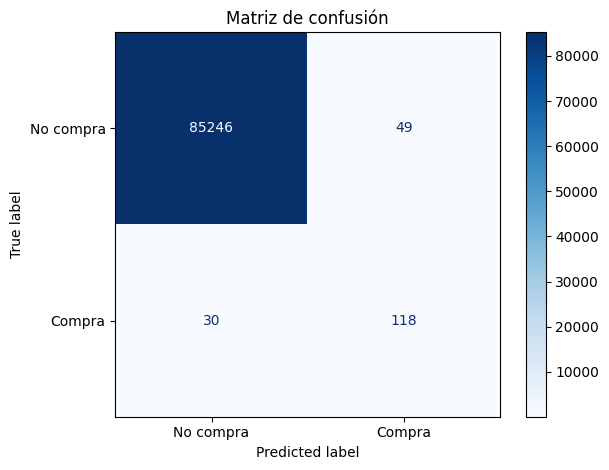

Accuracy del modelo: 1.00

Matriz de confusión:
 [[85246    49]
 [   30   118]]


<Figure size 1000x600 with 0 Axes>

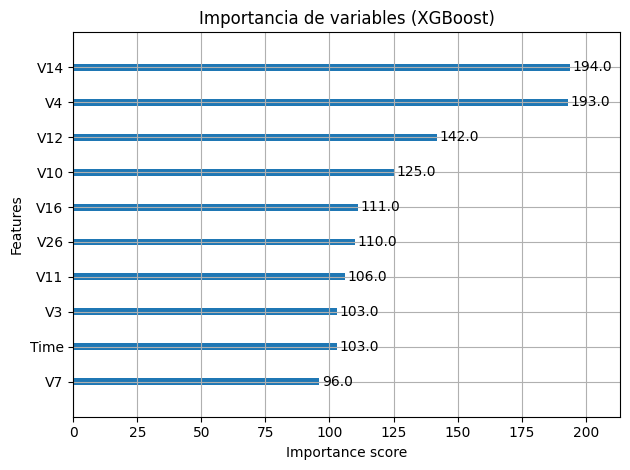

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Cargar el dataset
url = "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"
df = pd.read_csv(url)
df

# Separar características y variable objetivo
X = df.drop("Class", axis=1)
y = df["Class"]

# Calcular el peso de la clase positiva
n_pos = sum(y == 1)
n_neg = sum(y == 0)
scale_pos_weight = n_neg / n_pos
print("Scale_pos_weight: ", scale_pos_weight)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Entrenar el modelo XGBoost
model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='auc'
)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluación
print("ROC-AUC:", round(roc_auc_score(y_test, y_pred_proba), 4))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
matriz = confusion_matrix(y_test, y_pred)

# Visualización de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=["No compra", "Compra"])
disp.plot(cmap='Blues')
plt.title("Matriz de confusión")
plt.tight_layout()
plt.show()

# Resultados
print(f"Accuracy del modelo: {accuracy:.2f}")
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))

# Importancia de variables
plt.figure(figsize=(10, 6))
plot_importance(model, max_num_features=10, importance_type='weight')
plt.title("Importancia de variables (XGBoost)")
plt.tight_layout()
plt.show()

Tasa de verdaderos positivos (TP/(TP + FN)): de todo lo verdaderamente positivo, cuando estime correctamente.

* **Recall mejora desde un 0.72 a un 0.8**
* Escenario desbalanceado:
  * TP (Compra/Compra) = 108
  * FN (Compra/No Compra) = 40

* Escenario balanceado:
  * TP (Compra/Compra) = 118
  * FN (Compra/No Compra) = 30